In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import yfinance as yf
from datetime import date
import itertools
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric

# Data Preprocessing

In [2]:
# fetch the data
bitcoin = yf.Ticker("BTC-USD")
bitcoin

yfinance.Ticker object <BTC-USD>

In [3]:
#Get historical data
bitcoin_data = bitcoin.history(start ="2015-01-01", end=date.today(), interval="1d")

bitcoin_data.tail()

Open          High           Low         Close  \
Date                                                                 
2021-06-09  33416.976562  37537.371094  32475.865234  37345.121094   
2021-06-10  37389.515625  38334.324219  35847.593750  36702.597656   
2021-06-11  36697.031250  37608.695312  36044.449219  37334.398438   
2021-06-12  37340.144531  37408.925781  34728.191406  35552.515625   
2021-06-13  35555.789062  39322.781250  34864.109375  39097.859375   

                 Volume  Dividends  Stock Splits  
Date                                              
2021-06-09  53972919008          0             0  
2021-06-10  43576032854          0             0  
2021-06-11  38699736985          0             0  
2021-06-12  37924228550          0             0  
2021-06-13  40669112838          0             0

### Data Visualization

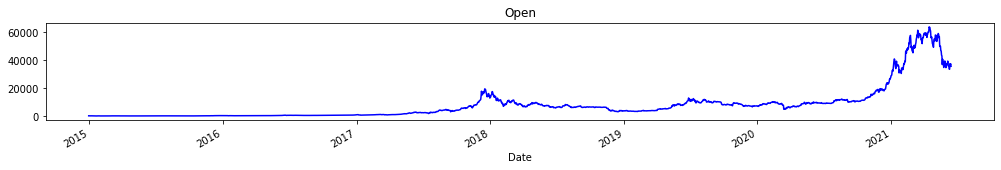

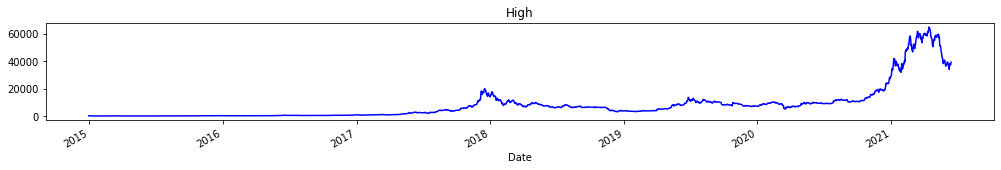

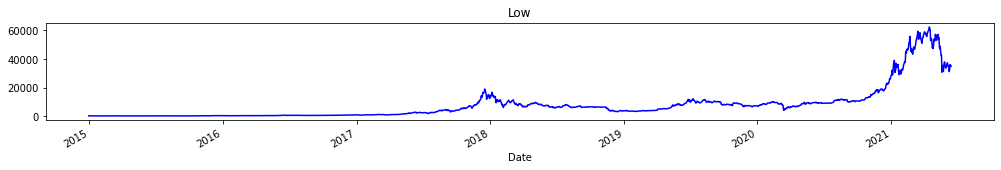

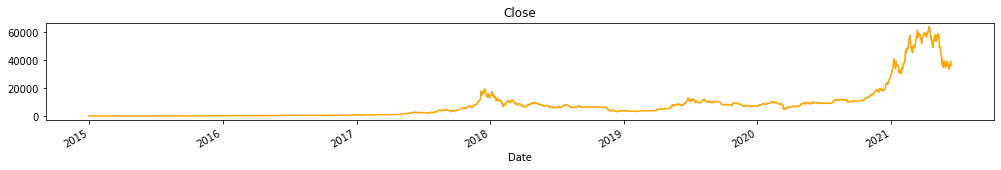

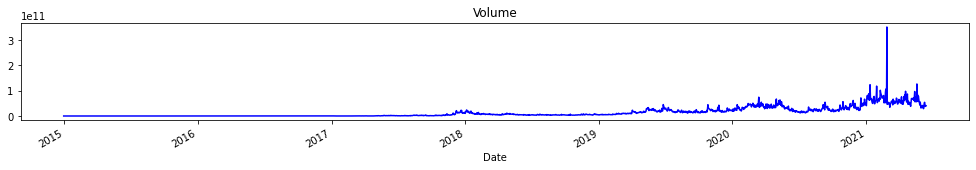

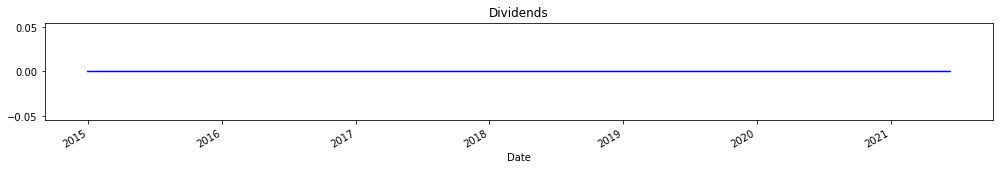

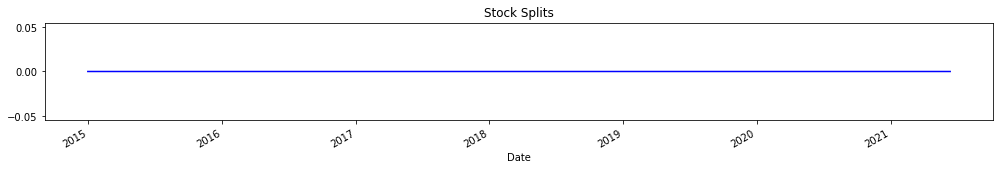

In [4]:
%matplotlib inline

for col in bitcoin_data.columns:
    color="orange" if col == "Close" else "blue"
    bitcoin_data[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()

In [5]:
# Reset the index, change Date to column
bitcoin_data = bitcoin_data.reset_index()
bitcoin_data.head()

Date        Open        High         Low       Close    Volume  \
0 2014-12-31  310.914001  320.192993  310.210999  320.192993  13942900   
1 2015-01-01  320.434998  320.434998  314.002991  314.248993   8036550   
2 2015-01-02  314.079010  315.838989  313.565002  315.032013   7860650   
3 2015-01-03  314.846008  315.149994  281.082001  281.082001  33054400   
4 2015-01-04  281.145996  287.230011  257.612000  264.195007  55629100   

   Dividends  Stock Splits  
0          0             0  
1          0             0  
2          0             0  
3          0             0  
4          0             0

In [7]:
#check if date is in datetime format
bitcoin_data.Date.dtype

dtype('<M8[ns]')

### Changing the Column names
Facebook prophet takes only two features(columns). The column names must be ds: date, s:close. We are going to rename our columns.

In [8]:
#Extracting the date and close price columns
bitcoin_df = bitcoin_data[["Date", "Close"]]
bitcoin_df.head()

Date       Close
0 2014-12-31  320.192993
1 2015-01-01  314.248993
2 2015-01-02  315.032013
3 2015-01-03  281.082001
4 2015-01-04  264.195007

In [9]:
#rename the columns
bitcoin_df = bitcoin_df.rename(columns={'Date': 'ds', 'Close': 'y'})
bitcoin_df.head()

ds           y
0 2014-12-31  320.192993
1 2015-01-01  314.248993
2 2015-01-02  315.032013
3 2015-01-03  281.082001
4 2015-01-04  264.195007

### Splitting the Data

In [10]:
index = int(0.8 * bitcoin_df.shape[0])
train_df = bitcoin_df[:index]
test_df = bitcoin_df[index:]

In [11]:
print(train_df.shape)
print(test_df.shape)

(1882, 2)
(471, 2)


### Hyperparameter Tuning

In [12]:
cutoffs = pd.to_datetime(["2016-01-09", "2016-07-09", "2017-01-09"])

In [14]:
# import itertools
# from fbprophet.diagnostics import performance_metrics
# from fbprophet.diagnostics import cross_validation
# from fbprophet.plot import plot_cross_validation_metric
# param_grid = {  
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
# }

# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# rmses = []  # Store the RMSEs for each params here

# # Use cross validation to evaluate all parameters
# for params in all_params:
#     m = Prophet(**params).fit(train_df)  # Fit model with given params
#     df_cv = cross_validation(m, initial='730 days', period = '31 days', horizon = '365 days')
#     cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']
#     cutoff = df_cv['cutoff'].unique()[0]
#     df_cv = df_cv[df_cv['cutoff'].values == cutoff]

#     rmses.append(df_p['rmse'].values[0])

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['rmse'] = rmses
# print(tuning_results)

## Fitting the Model

In [13]:
model = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True,yearly_seasonality=True, interval_width = 0.95)
model.add_seasonality('self_define_cycle',period=8,fourier_order=8,mode='additive')
model.fit(train_df)

## Make Future Prediction
ðŸ‘‡Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [14]:
horizon = 36
future = model.make_future_dataframe(periods =horizon, freq="M")
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat     yhat_lower     yhat_upper
1913 2022-09-30  25949.510494 -181280.494306  242911.582949
1914 2022-10-31  25894.829024 -190406.033903  253899.199715
1915 2022-11-30  24695.492591 -199173.957980  262701.896813
1916 2022-12-31  25168.768567 -206821.698458  271347.875911
1917 2023-01-31  25427.933061 -216739.307746  283692.349979

## Plotting the Forecast

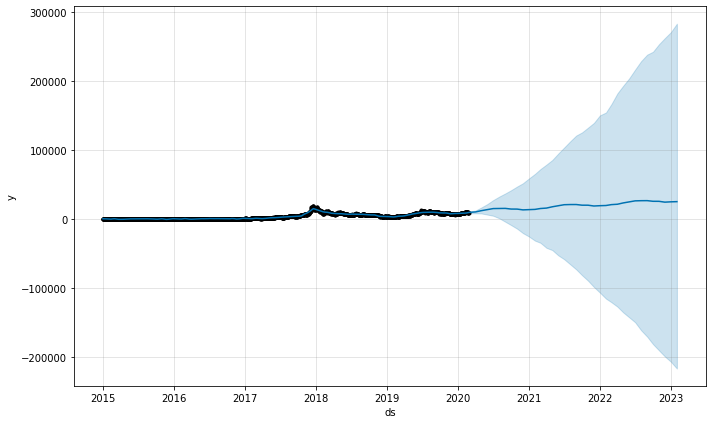

In [15]:
ax = model.plot(forecast);

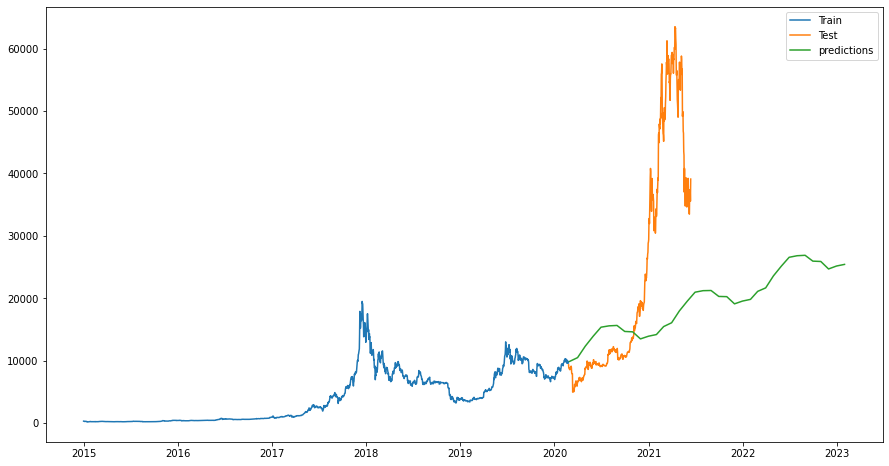

In [16]:
#Plotting the train, test and forecast for comparison
plt.figure(figsize=(15, 8))
plt.plot(train_df['ds'], train_df['y'], label="Train")
plt.plot(test_df['ds'], test_df['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

The Train data is from 2015-the beginning of 2020, while the test data is from the beginning of 2020 to middle of 2021 and our forecasted data started predicting from 2020 to 2023

## Time Series' trend and seasonality

ðŸ‘‡ Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

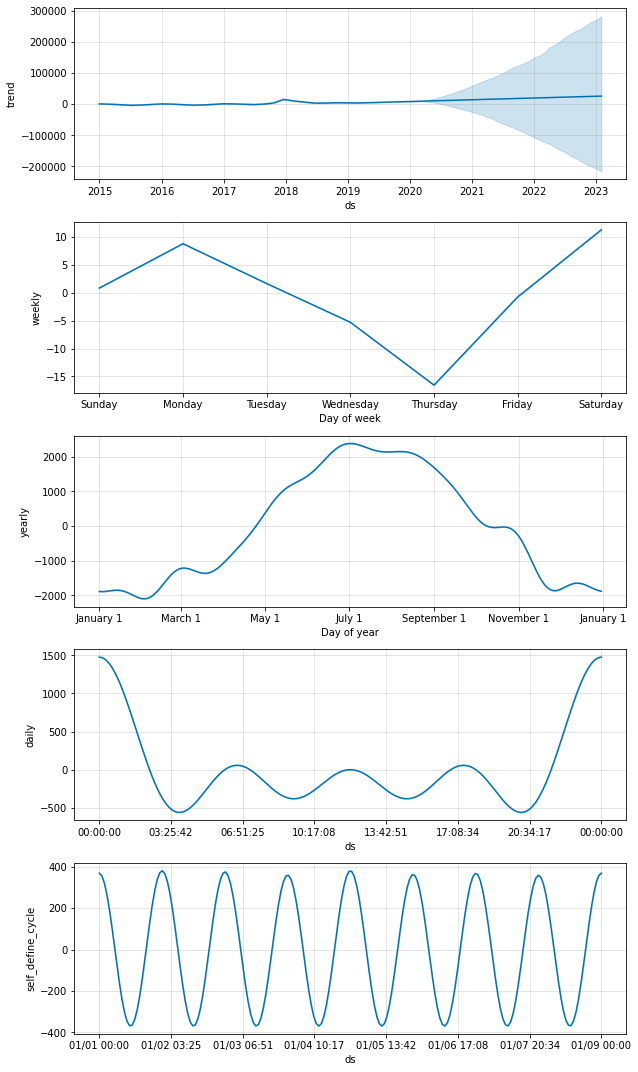

In [17]:
model.plot_components(forecast);

## Evaluating the model with cross-validation!
ðŸ‘‡ Using cross_validation() and performance_metrics() from fbprophet.diagnostics, evaluate the performance of your model

More precisely, create a Time Series K-fold CV with

* train sets of size 5 years
* horizon val sizes of 1 years
* shifting each fold by 180 days


In [18]:
# Your code here
cv_results = cross_validation(model=model, initial=f'{365 * 3} days', horizon='365 days', period='180 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2018-03-01 00:00:00 and 2019-02-24 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
cv_results.tail()

ds         yhat    yhat_lower    yhat_upper            y  \
1090 2020-02-20 -2653.370090 -31554.107879  30408.886050  9608.475586   
1091 2020-02-21 -2624.984450 -32018.400719  31825.267931  9686.441406   
1092 2020-02-22 -2579.390082 -31640.944058  30656.005354  9663.181641   
1093 2020-02-23 -2550.895060 -32237.569556  31097.022901  9924.515625   
1094 2020-02-24 -2545.176066 -31928.716389  30413.692425  9650.174805   

         cutoff  
1090 2019-02-24  
1091 2019-02-24  
1092 2019-02-24  
1093 2019-02-24  
1094 2019-02-24

In [20]:
#performance metrics
df_p = performance_metrics(cv_results)
df_p.head()

horizon           mse         rmse         mae      mape     mdape  coverage
0 37 days  9.278144e+05   963.231252  805.010041  0.150224  0.112743  0.899083
1 38 days  9.930138e+05   996.500761  826.216634  0.155078  0.115733  0.896024
2 39 days  1.052895e+06  1026.106659  845.942971  0.159946  0.116234  0.896024
3 40 days  1.111605e+06  1054.326950  863.421090  0.164505  0.117711  0.896024
4 41 days  1.176506e+06  1084.668566  882.236214  0.168944  0.118359  0.889908

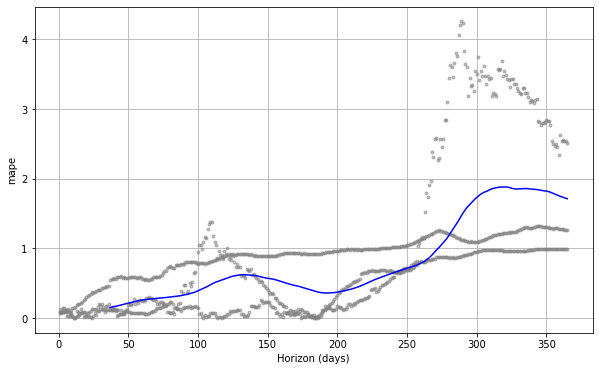

In [21]:
plot_cross_validation_metric(cv_results, metric='mape');

## Tuning our model

In [22]:
m = Prophet(
    growth="linear",
    seasonality_mode="additive",
    changepoint_prior_scale =30,
    seasonality_prior_scale=35,
    holidays_prior_scale = 20,
    daily_seasonality = False,
    weekly_seasonality = False,
    yearly_seasonality = False,).add_seasonality(
    name="monthly",
    period =30.5,
    fourier_order = 55).add_seasonality(
    name="daily",
    period =1,
    fourier_order = 15).add_seasonality(
    name="weekly",
    period = 7,
    fourier_order = 20).add_seasonality(
    name="yearly",
    period =365.25,
    fourier_order = 20).add_seasonality(
    name="quarterly",
    period =365.25/4,
    fourier_order = 15,
    prior_scale = 15)

In [23]:
m.fit(train_df)

In [24]:
import json
from fbprophet.serialize import model_to_json, model_from_json
with open('serialized_model.json', 'w') as bitcoin:
    json.dump(model_to_json(m),bitcoin)

In [25]:
horizon = 36
future = m.make_future_dataframe(periods =horizon, freq="M")
forecast2 = m.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat     yhat_lower     yhat_upper
1913 2022-09-30  26543.185246 -165724.779993  217024.762268
1914 2022-10-31  26845.780016 -177883.977874  227752.498126
1915 2022-11-30  25121.050695 -194869.791782  237434.761906
1916 2022-12-31  26535.548874 -203497.197131  249905.825999
1917 2023-01-31  26534.298831 -215688.565485  260038.172219

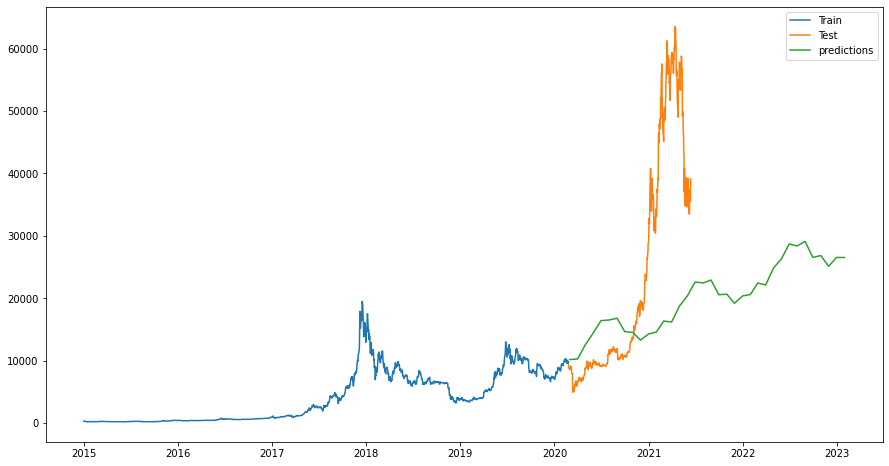

In [26]:
#Plotting the train, test and forecast for comparison
plt.figure(figsize=(15, 8))
plt.plot(train_df['ds'], train_df['y'], label="Train")
plt.plot(test_df['ds'], test_df['y'], label="Test")
plt.plot(forecast2[-horizon:]['ds'], forecast2[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

In [27]:
# Your code here
cv_results = cross_validation(model=m, initial=f'{365 * 3} days', horizon='365 days', period='180 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2018-03-01 00:00:00 and 2019-02-24 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [28]:
#performance metrics
df_p = performance_metrics(cv_results)
df_p.head()

horizon           mse         rmse          mae      mape     mdape  \
0 37 days  2.570649e+06  1603.324209  1291.111848  0.187519  0.194179   
1 38 days  2.565342e+06  1601.668646  1308.083235  0.192458  0.201671   
2 39 days  2.533941e+06  1591.835653  1318.947420  0.196659  0.208425   
3 40 days  2.501472e+06  1581.604151  1330.505163  0.200912  0.216788   
4 41 days  2.494570e+06  1579.420938  1344.449981  0.204941  0.216827   

   coverage  
0  0.455657  
1  0.446483  
2  0.437309  
3  0.428135  
4  0.418960

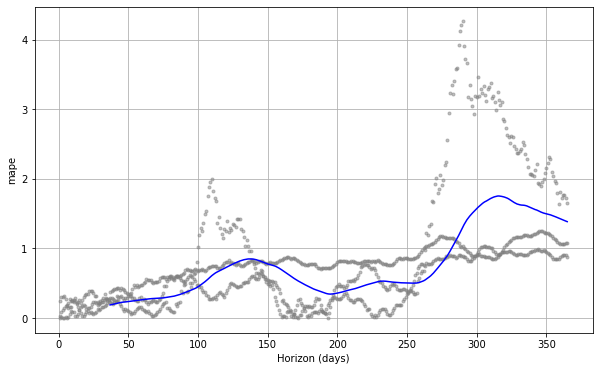

In [29]:
plot_cross_validation_metric(cv_results, metric='mape');